# Text mining na API do Twitter

<img src='textmainig.jpg'>

# Qual o objetivo desse tutorial?

Apresentar um exemplo simples de text mining usando o Python. Para isso iremos tentar responder a seguinte pergunta: Qual das seguintes linguagens de programação são mais populares, Python, Java ou Ruby? 

# O que é text mining?

 Text Mining ou Mineração de Texto, é semelhante à análise textual, refere-se ao processo de obtenção de informações importantes de um texto.

# Como iremos fazer isso?

Iremos usar a linguagem Python para capturar tweets, através da API do Twitter, que contenham em seu texto a palavra *Python*, *Java* ou *Ruby*. Iremos tratar esses dados e por fim criar um gráfico de Barras para ver a frequência em que essas linguagens são mencionadas nos tweets.  

# 1º - Criar conta no twitter

Caso precise de ajuda leia [isso](https://canaltech.com.br/tutorial/twitter/como-criar-uma-conta-no-twitter/).

# 2º Criar conta de desenvolvedor no twitter

Entre no seguinte link: https://dev.twitter.com/rest/public

Para saber como criar as chaves secretas e tokens de acesso à API do Twitter assista esse [vídeo](https://www.youtube.com/watch?v=1p8veF-sIIo).


# Capturando os Dados

In [2]:
# Bibliotecas nescessárias

import twitter
import os

In [26]:
consumer_key = os.environ['consumer_key']
consumer_secret = os.environ['consumer_secret']
access_token_key= os.environ['access_token_key']
access_token_secret = os.environ['access_token_secret']

api = twitter.Api(consumer_key=consumer_key,
                  consumer_secret=consumer_secret,
                  access_token_key=access_token_key,
                  access_token_secret=access_token_secret)
dados = []
for tw in api.GetStreamFilter(track=['python', 'java', 'ruby']):
    dados.append(tw)

KeyboardInterrupt: 

In [27]:
arquivo = open('dados_twitter3.txt', 'w')

for linha in dados:
    arquivo.write("%s\n" % linha)

# Organizando os dados 

In [6]:
# Bibliotecas necessárias 

import json
import ast 
import pandas as pd 
import matplotlib.pyplot as plt
import re

In [5]:
# 1º abrir arquivo com os dados do twitter  

tweets_data = []
with open('tweet_data.txt', "r") as tweets_file:
    tweets_data = [ast.literal_eval(line) for line in tweets_file]

In [7]:
# 2º Ornanizando os dados num dataframe 
tweets = pd.DataFrame()
tweets['text'] = [tweet.get('text','') for tweet in tweets_data]
tweets['lang'] = [tweet.get('lang','') for tweet in tweets_data]

In [8]:
tweets.head()

,text,lang
0,今年はPythonと共に年を越したい,ja
1,RT @spookymxmas: Finished Ruby! It only has to...,en
2,Zero to Hero with Python Tutorial FULL Easy Le...,en
3,Zero to Hero with Python Tutorial FULL Easy Le...,en
4,RT @cmilllzzz: Ruby been raising tf outta max ...,en


In [9]:
# precisamos de uma função para pesquisar 
# se uma palavra 'x' aparece no texto
def word_in_text(word, text):
    '''
    Esta função verifica se a palavra word 
    existe no texto text:
    return --> False ou True
    '''
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True

    return False

In [10]:
# 4º Vamos acrescentar em nosso dataframe mais 
# algumas colunas que endicam as ocorrências 
# das palavras python, java e ruby
tweets['python'] = [word_in_text('python', tweet) for tweet in tweets['text']]
tweets['java'] = [word_in_text('java', tweet) for tweet in tweets['text']]
tweets['ruby'] = [word_in_text('ruby', tweet) for tweet in tweets['text']]

In [11]:
tweets.head()

,text,lang,python,java,ruby
0,今年はPythonと共に年を越したい,ja,True,False,False
1,RT @spookymxmas: Finished Ruby! It only has to...,en,False,False,True
2,Zero to Hero with Python Tutorial FULL Easy Le...,en,True,False,False
3,Zero to Hero with Python Tutorial FULL Easy Le...,en,True,False,False
4,RT @cmilllzzz: Ruby been raising tf outta max ...,en,False,False,True


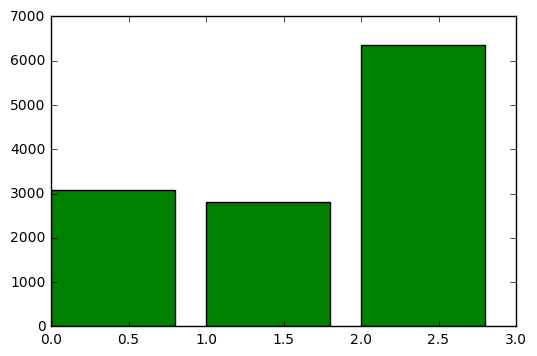

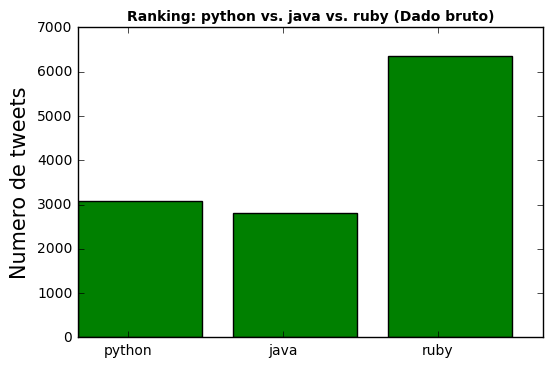

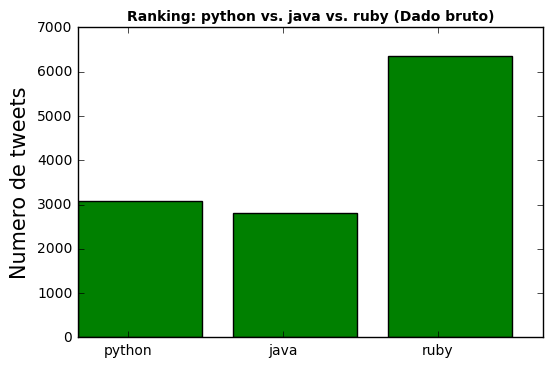

In [14]:
# 5º vamos plotar a frequência de aparição dessas palavras nos tweets
prg_langs = ['python', 'java', 'ruby']
tweets_by_prg_lang = [tweets['python'].value_counts()[True], tweets['java'].value_counts()[True], tweets['ruby'].value_counts()[True]]
x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

ax.set_ylabel('Numero de tweets', fontsize=15)
ax.set_title('Ranking: python vs. java vs. ruby (Dado bruto)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)

plt.show()

# Refletindo sobre o resultado

Será que esses dados estão refletindo a realidade? Será que o Ruby é mais popular que o Java e Python? Será que existe alguma coisa está viesando nossa análise? Dêem uma googlada é tenter descobrir se é isso mesmo. 

# Minerando os dados relevantes

In [19]:
# 6º Vamos adicionar mais 2 colunas, uma para a 
# verificação da palavra programing, outra 
# para a palavra tutorial e outra para a palavra code
# e outra para a palavra coding.

tweets['programming'] = [word_in_text('programming', tweet) for tweet in tweets['text']]
tweets['tutorial'] = [word_in_text('tutorial', tweet) for tweet in tweets['text']]
tweets['code'] = [word_in_text('code', tweet) for tweet in tweets['text']]
tweets['coding'] = [word_in_text('coding', tweet) for tweet in tweets['text']]

# vamos criar uma coluna que nos indique
# se a linha é relevante ou não
tweets['relevant'] = [word_in_text('programming', tweet) or
                      word_in_text('tutorial', tweet) or
                      word_in_text('code', tweet) or 
                      word_in_text('coding', tweet)
                      for tweet in tweets['text']]

In [20]:
tweets.head()

,text,lang,python,java,ruby,programming,tutorial,code,coding,relevant
0,今年はPythonと共に年を越したい,ja,True,False,False,False,False,False,False,False
1,RT @spookymxmas: Finished Ruby! It only has to...,en,False,False,True,False,False,False,False,False
2,Zero to Hero with Python Tutorial FULL Easy Le...,en,True,False,False,False,True,False,False,True
3,Zero to Hero with Python Tutorial FULL Easy Le...,en,True,False,False,False,True,False,False,True
4,RT @cmilllzzz: Ruby been raising tf outta max ...,en,False,False,True,False,False,False,False,False


In [21]:
# Vamos contar quantas vezes esses dados  
# relevantes parecem para cada linguagem
tweets_by_prg_lang = [tweets[tweets['relevant'] == True]['python'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['java'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['ruby'].value_counts()[True]]


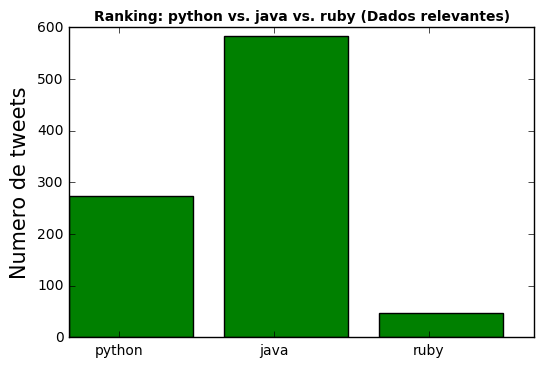

In [22]:
# Por fim, vamos plotar esses dados relevantes
x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width,alpha=1,color='g')
ax.set_ylabel('Numero de tweets', fontsize=15)
ax.set_title('Ranking: python vs. java vs. ruby (Dados relevantes)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)

plt.show()